## Import libraries and collect Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
df = pd.DataFrame({
    "area": [2600,3000,3200,3600,4000],
    "bedrooms": [3,4,np.NaN,3,5],
    "age": [20,15,18,30,8],
    "price": [550000,565000,610000,595000,760000]
})
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


## Clean data

In [5]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
df.bedrooms.fillna(median_bedrooms, inplace=True)

In [6]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


## Analyze data

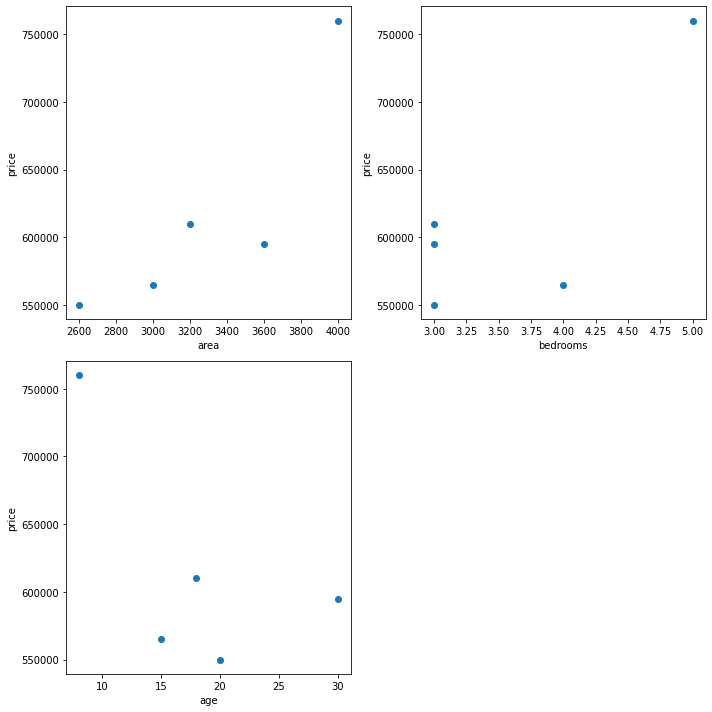

In [7]:
# First way
columns = df.drop("price", axis="columns").columns
halfcol = math.ceil(len(columns)/2)
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(halfcol, halfcol, i+1)
    column = columns[i]
    plt.xlabel(column)
    plt.ylabel("price")
    plt.scatter(df[column], df["price"])

fig.tight_layout()




[<AxesSubplot:xlabel='area', ylabel='price'>,
 <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
 <AxesSubplot:xlabel='age', ylabel='price'>]

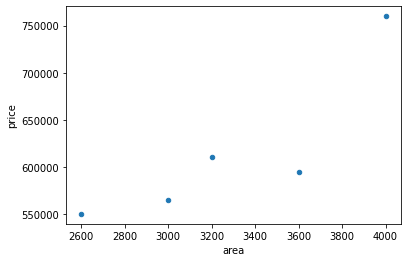

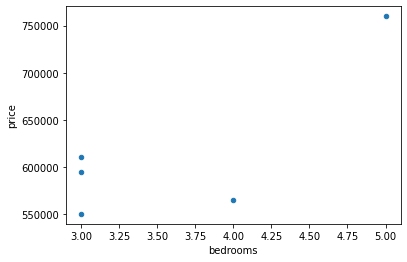

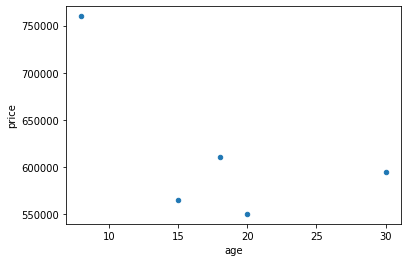

In [8]:
# Better way (using method of df)
[df.plot.scatter(x=column, y="price") for column in df.drop("price", axis="columns").columns]

## Create model (train and test)

In [9]:
X = df.drop("price", axis="columns")
Y = df["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
mymodel = linear_model.LinearRegression()
mymodel.fit(X_train, Y_train)

LinearRegression()

In [10]:
mymodel.coef_

array([   86.25,     0.  , -4125.  ])

In [11]:
mymodel.intercept_

408249.99999999994

In [14]:
mymodel.predict(X_test)

array([720250., 605125.])

In [15]:
Y_test

4    760000
1    565000
Name: price, dtype: int64

In [16]:
mymodel.score(X_test,Y_test)

0.8322115384615385

## Predict

In [12]:
mymodel.predict([[3000,3,40]])

array([502000.])